In [1]:
import pandas
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
training_data = pandas.read_csv("train.csv")

In [3]:
print(training_data, training_data.shape)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [4]:
training_data = training_data.values

x_train = training_data[:, 1:]
y_train = training_data[:, 0]

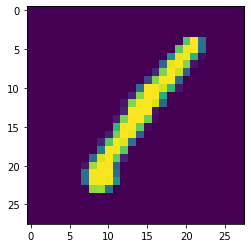

In [5]:
plt.imshow(x_train[0].reshape(28,28))

# Part 1: Pre-Deep Learning
This section of code was built prior to taking the Deep Learning Specialization by DeepLearning.ai

In [173]:
model = tf.keras.Sequential([
    layers.Dense(150, activation="relu", input_dim=784),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [174]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [175]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.1423 - accuracy: 0.8671
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.9256
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2473 - accuracy: 0.9407
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1883 - accuracy: 0.9509
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1571 - accuracy: 0.9566
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy: 0.9606
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.9643
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9697
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9705
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.093

In [6]:
test_data = pandas.read_csv("test.csv")

x_test = test_data.values

print(x_test[0].shape)

(784,)


In [44]:
random_index = random.randint(0, test_data.shape[0]-1)

print("Prediction: ", np.argmax(model.predict(np.array([x_test[random_index]]))))
plt.imshow(x_test[random_index].reshape(28,28))

In [ ]:
check_predict(model, x_test)

In [178]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [179]:
df = pandas.DataFrame(data=predictions)
df.index.name = "ImageId"
df.index += 1
df.to_csv("test_predictions.csv", header=["Label"], index=True)

96% Accuracy! Not bad.

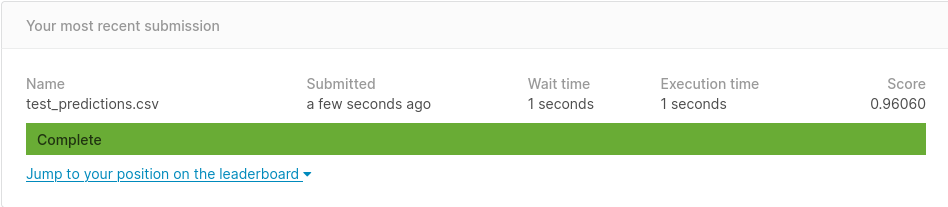

# Part 2: Post-Deep Learning
This part of code was done after taking the Deep Learning Specialization by DeepLearning.ai

In [7]:
def cnn_model():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    conv1 = tf.keras.layers.Conv2D(10, (2,2), activation="relu", padding="same")(inputs)
    max1 = tf.keras.layers.MaxPool2D()(conv1)
    conv2 = tf.keras.layers.Conv2D(40, (2,2), activation="relu")(max1)
    max2 = tf.keras.layers.MaxPool2D()(conv2)
    flattened = tf.keras.layers.Flatten()(max2)
    dense1 = tf.keras.layers.Dense(10)(flattened)
    output = tf.keras.layers.Softmax()(dense1)
    
    model = tf.keras.Model(inputs=inputs, outputs=output)
    
    return model

In [8]:
model = cnn_model()

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 10)        50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 40)        1640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1440)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                14410 

In [10]:
#print(y_train)
x_train_reshaped = tf.reshape(x_train, (-1, 28,28,1))
y_train_oh = tf.one_hot(y_train, 10)

In [11]:
print(x_train_reshaped)
print(y_train_oh)

tf.Tensor(
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
  

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [13]:
model.fit(x_train_reshaped, y_train_oh, epochs=5)

Epoch 1/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.9800 - accuracy: 0.9096
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1192 - accuracy: 0.9678
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0739 - accuracy: 0.9773
Epoch 4/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0572 - accuracy: 0.9818
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0493 - accuracy: 0.9845


In [14]:
x_test_reshaped = tf.reshape(x_test, (-1, 28, 28, 1))

Prediction:  5


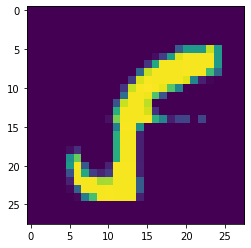

In [21]:
random_index = random.randint(0, x_test_reshaped.shape[0]-1)

plt.imshow(x_test_reshaped[random_index])
print("Prediction: ", np.argmax(model.predict(x_test_reshaped[random_index:random_index+1])))

In [22]:
predictions = np.argmax(model.predict(x_test_reshaped), axis=1)

In [23]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
df = pandas.DataFrame(data=predictions)
df.index.name = "ImageId"
df.index += 1
df.to_csv("test_predictions_cnn.csv", header=["Label"], index=True)

Now its 98%, and we take 0 seconds to execute!

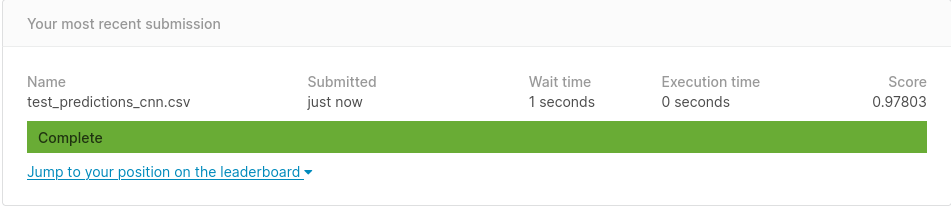